In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.ensemble import StackingClassifier

In [2]:
df = pd.read_csv("data/Caravan.csv").assign(Purchase=lambda df_: np.where(df_["Purchase"] == "Yes", 1, 0))

In [3]:
X = df.drop("Purchase", axis="columns")
y = df["Purchase"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [9]:
logistic = ("logistic", make_pipeline(StandardScaler(), LogisticRegression()))
balanced_forest = ("balanced forest", RandomForestClassifier(n_estimators=1000, class_weight="balanced"))
nb = ("nb", MultinomialNB())

stacking = ("stacking", StackingClassifier(estimators=[logistic, balanced_forest, nb]))

models = [
    ("dummy", DummyClassifier()),
    # ("balanced logistic", make_pipeline(StandardScaler(), LogisticRegression(class_weight="balanced"))),
    # logistic,
    # ("balanced tree", DecisionTreeClassifier(class_weight="balanced")),
    # ("tree", DecisionTreeClassifier()),
    # balanced_forest,
    # ("forest", RandomForestClassifier(n_estimators=1000)),
    # ("balanced extratrees", ExtraTreesClassifier(class_weight="balanced")),
    # ("extratrees", ExtraTreesClassifier()),
    # ("balanced nb", MultinomialNB(class_prior=[.5, .5])),
    # nb,
    stacking
    ]

dummy
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1369
           1       0.00      0.00      0.00        87

    accuracy                           0.94      1456
   macro avg       0.47      0.50      0.48      1456
weighted avg       0.88      0.94      0.91      1456




/Users/edwardkrueger/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/edwardkrueger/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/edwardkrueger/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

stacking
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1369
           1       0.00      0.00      0.00        87

    accuracy                           0.94      1456
   macro avg       0.47      0.50      0.48      1456
weighted avg       0.88      0.94      0.91      1456




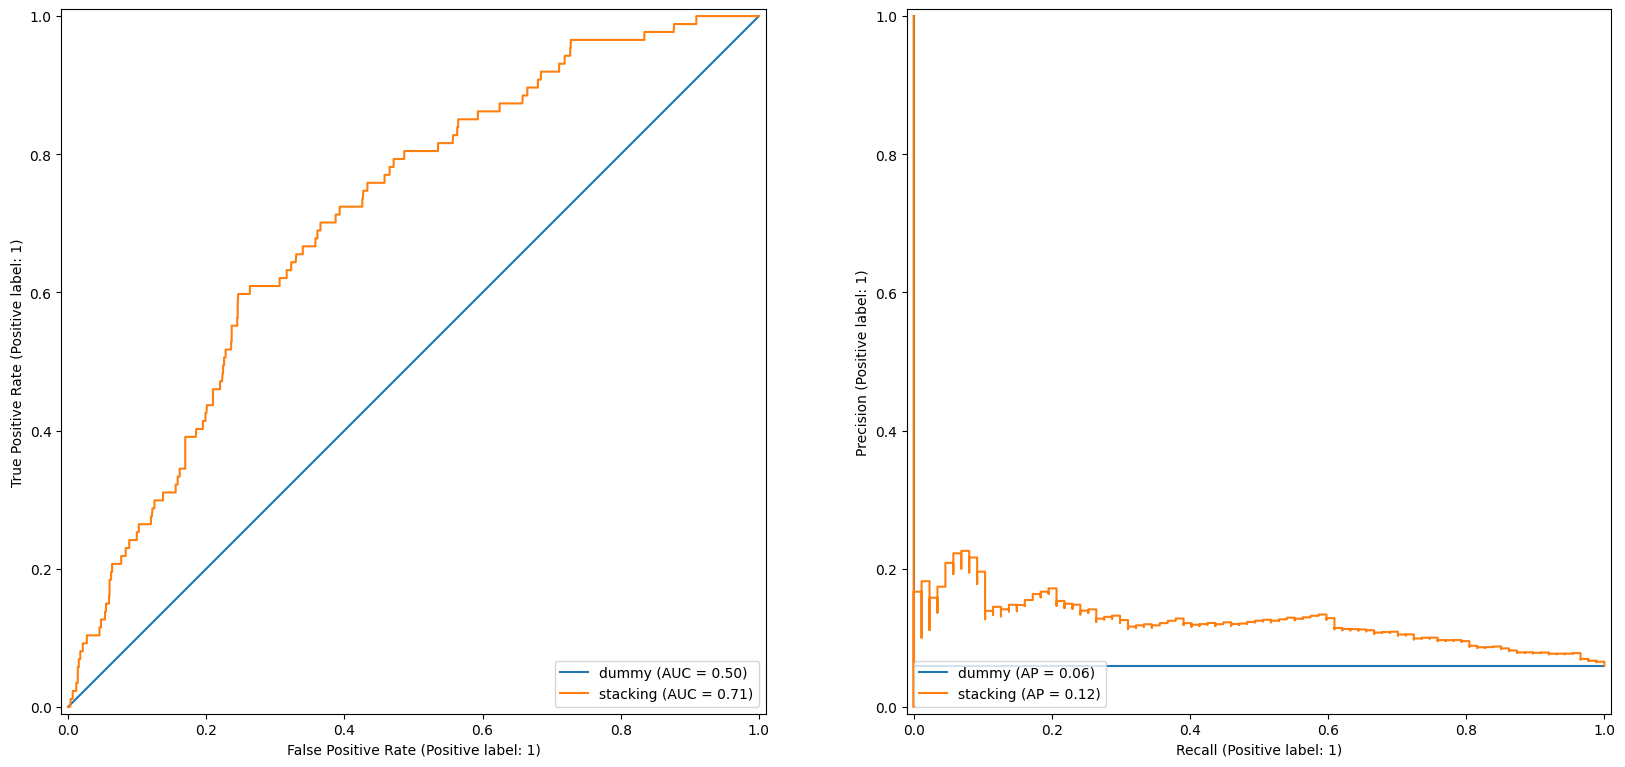

In [10]:
_, axs = plt.subplots(1, 2, figsize=(20, 10))

for name, model in models:

    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    RocCurveDisplay.from_estimator(model, X_test, y=y_test, ax=axs[0], name=name)
    PrecisionRecallDisplay.from_estimator(model, X_test, y=y_test, ax=axs[1], name=name)
    
    print(name)
    print(classification_report(y_true=y_test, y_pred=y_test_pred))
    print()

plt.show()

In [15]:
y_test_proba = stacking[1].predict_proba(X_test)[:, 1]

In [16]:
y_test_proba

array([0.03703036, 0.08998411, 0.03226848, ..., 0.03902864, 0.1064836 ,
       0.11115661])

In [31]:
precisions, recalls, thresholds = precision_recall_curve(y_true=y_test, y_score=y_test_proba)

thresholds = [0] + list(thresholds)

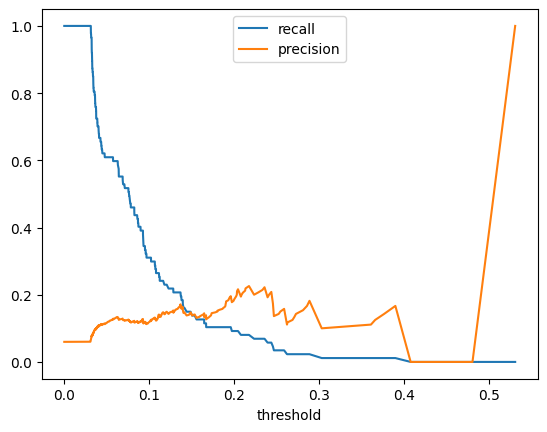

In [37]:
plt.plot(thresholds, recalls, label="recall")
plt.plot(thresholds, precisions, label="precision")
plt.xlabel("threshold")
plt.legend()

In [49]:
y_test_threshold_pred = np.where(y_test_proba > .10, 1, 0)

In [50]:
print(classification_report(y_true=y_test, y_pred=y_test_threshold_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1369
           1       0.12      0.31      0.17        87

    accuracy                           0.82      1456
   macro avg       0.54      0.58      0.54      1456
weighted avg       0.90      0.82      0.86      1456

